In [92]:
pip install scikit-learn

In [93]:
pip install seaborn

In [94]:
pip install tensorflow

In [95]:
import numpy as np 
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()
from sklearn.preprocessing import StandardScaler

In [96]:
df_seg = pd.read_csv('segmentation data.csv', index_col =0)

# New Section

In [97]:
df_seg.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [98]:
df_seg.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [99]:
df_seg.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


[Text(0.5, 0, 'Sex'),
 Text(1.5, 0, 'Marital status'),
 Text(2.5, 0, 'Age'),
 Text(3.5, 0, 'Education'),
 Text(4.5, 0, 'Income'),
 Text(5.5, 0, 'Occupation'),
 Text(6.5, 0, 'Settlement size')]

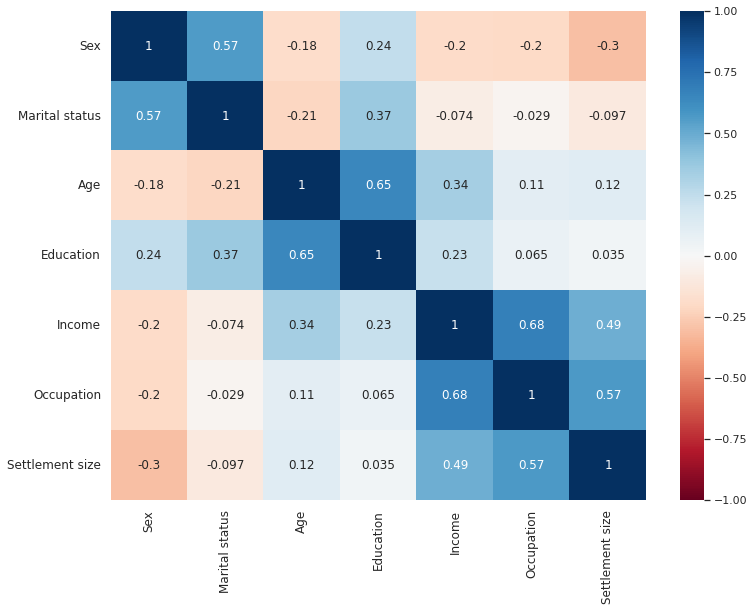

In [100]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_seg.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


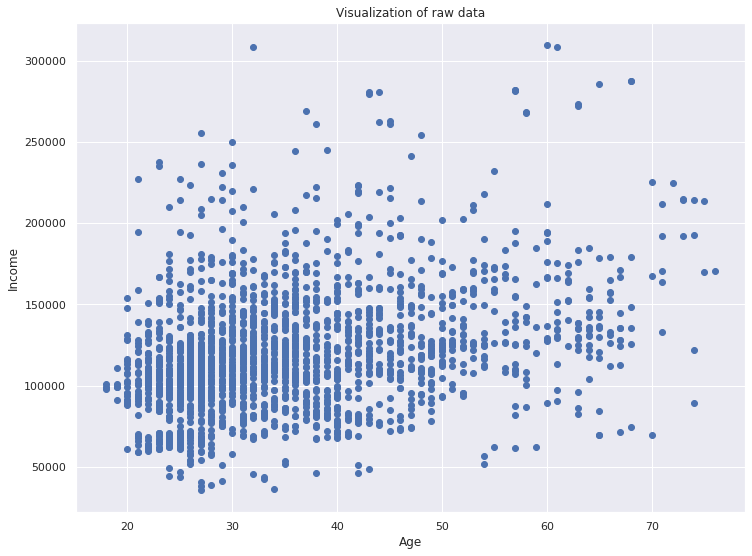

In [101]:
plt.figure(figsize = (12, 9))
plt.scatter(df_seg.iloc[:, 2], df_seg.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')
df_seg

In [102]:
scaler = StandardScaler()
seg_std = scaler.fit_transform(df_seg)

In [103]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [104]:
hier_clust = linkage(seg_std, method = 'ward')

In [105]:
seg_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

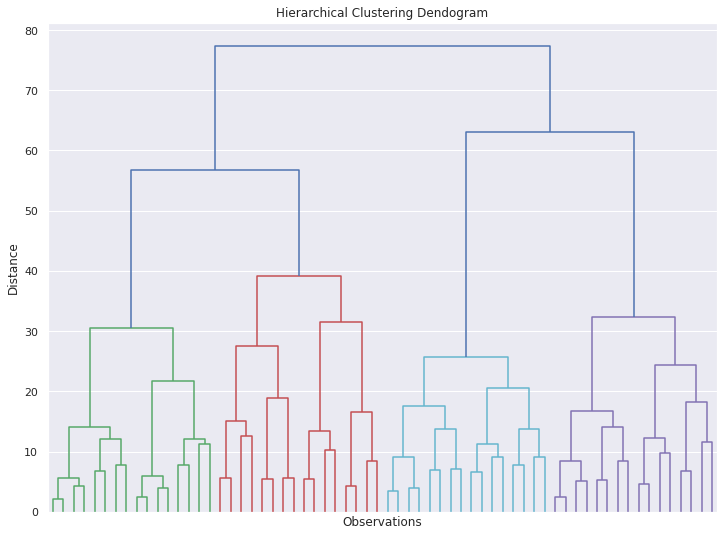

In [106]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust, show_leaf_counts = False,
           no_labels = True,
           truncate_mode = 'level',
           p=5)
plt.show()

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(seg_std)
    wcss.append(kmeans.inertia_)


In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('KMeans Clustering')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)


In [ ]:
kmeans.fit(seg_std)

In [ ]:
df_seg_kmeans = df_seg.copy()
df_seg_kmeans['Segment K-means'] = kmeans.labels_

In [ ]:
df_seg_analysis = df_seg_kmeans.groupby(['Segment K-means']).mean()
df_seg_analysis

In [ ]:
df_seg_analysis['N Obs'] = df_seg_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()

In [ ]:
df_seg_analysis['Prop Obs'] = df_seg_analysis['N Obs']/ df_seg_analysis['N Obs'].sum()

In [ ]:
df_seg_analysis

In [ ]:
df_seg_analysis.rename({0:'Well-off',
                        1:'Fewer-opportunities',
                        2:'Career-focused',
                        3:'Standard'})

In [ ]:
df_seg_kmeans['Labels'] = df_seg_kmeans['Segment K-means'].map({0:'Well-off',
                                                                1:'Fewer-opportunities',
                                                                2:'Career-focused',
                                                                3:'Standard'})


In [ ]:
x_axis = df_seg_kmeans['Age']
y_axis = df_seg_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()


Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

In [ ]:
pca.fit(seg_std)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Explained Variance')

In [ ]:
pca = PCA(n_components = 3)

In [ ]:
pca.fit(seg_std)

In [ ]:
pca4 = PCA(n_components = 4)

In [ ]:
pca4.fit(seg_std)

In [ ]:
pca.components_

In [ ]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_seg.columns.values, 
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

In [ ]:
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0,1,2],
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

In [ ]:
pca.transform(seg_std)

In [ ]:
scores_pca = pca.transform(seg_std)

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

In [ ]:
plt.figure(figsize = (10,9))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('WCSS')
plt.ylabel('K-means PCA Clustering')
plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [ ]:
kmeans_pca.fit(scores_pca)

In [ ]:
df_seg_pca_kmeans = pd.concat([df_seg.reset_index(drop = True) , pd.DataFrame(scores_pca)], axis =1)

In [ ]:
df_seg_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_seg_pca_kmeans['Segment K-Means PCA'] = kmeans_pca.labels_

In [ ]:
df_seg_pca_kmeans

In [ ]:
df_seg_pca_kmeans_freq = df_seg_pca_kmeans.groupby([ 'Segment K-Means PCA']).mean()

In [ ]:
df_seg_pca_kmeans_freq

In [ ]:
df_seg_pca_kmeans_freq['N Obs'] = df_seg_pca_kmeans[['Segment K-Means PCA', 'Sex']].groupby(['Segment K-Means PCA']).count()
df_seg_pca_kmeans_freq['Prop Obs'] = df_seg_pca_kmeans_freq['N Obs']/df_seg_pca_kmeans_freq['N Obs'].sum()

In [143]:
df_seg_pca_kmeans_freq = df_seg_pca_kmeans_freq.rename({0: 'well-off',
                                                        2:'standard',
                                                        3:'career-focused',
                                                        1:'fewer-opportunities,'})

In [144]:
df_seg_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-Means PCA,,,,,,,,,,,,
well-off,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,264,0.1320
"fewer-opportunities,",0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,459,0.2295
standard,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,694,0.3470
career-focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


In [148]:
df_seg_pca_kmeans_freq['N Obs'] = df_seg_pca_kmeans[['Segment K-Means PCA', 'Sex']].groupby(['Segment K-Means PCA']).count()
df_seg_pca_kmeans_freq['Prop Obs'] = df_seg_pca_kmeans_freq['N Obs'] / df_seg_pca_kmeans_freq['N Obs'].sum()
df_seg_pca_kmeans_freq = df_seg_pca_kmeans_freq.rename({0:'well-off',
                                                        1:'fewer-opportunities',
                                                        2:'standard',
                                                        3:'career-focused'})
df_seg_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-Means PCA,,,,,,,,,,,,
well-off,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,NaN,NaN
"fewer-opportunities,",0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,NaN,NaN
standard,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,NaN,NaN
career-focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,NaN,NaN


In [149]:
df_seg_pca_kmeans['Legend'] = df_seg_pca_kmeans['Segment K-Means PCA'].map({0:'well-off',
                                                        1:'fewer-opportunities',
                                                        2:'standard',
                                                        3:'career-focused'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

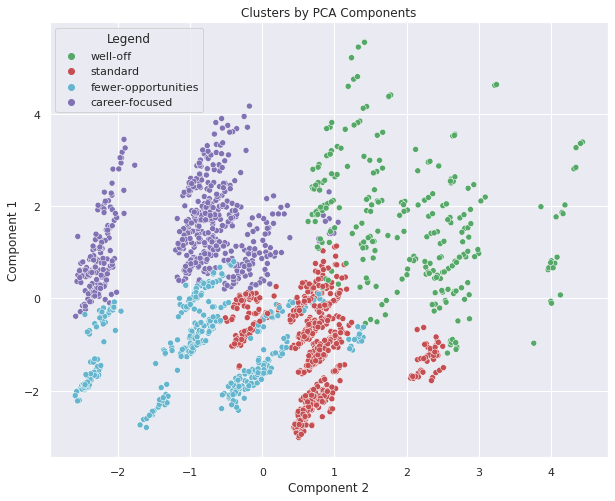

In [150]:
x_axis = df_seg_pca_kmeans['Component 2']
y_axis = df_seg_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['Legend'], palette = ['g','r','c','m'])
plt.title('Clusters by PCA Components')
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

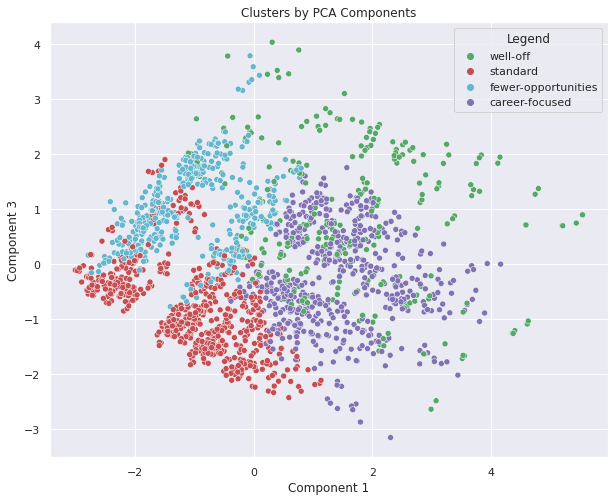

In [151]:
x_axis = df_seg_pca_kmeans['Component 1']
y_axis = df_seg_pca_kmeans['Component 3']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['Legend'], palette = ['g','r','c','m'])
plt.title('Clusters by PCA Components')
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

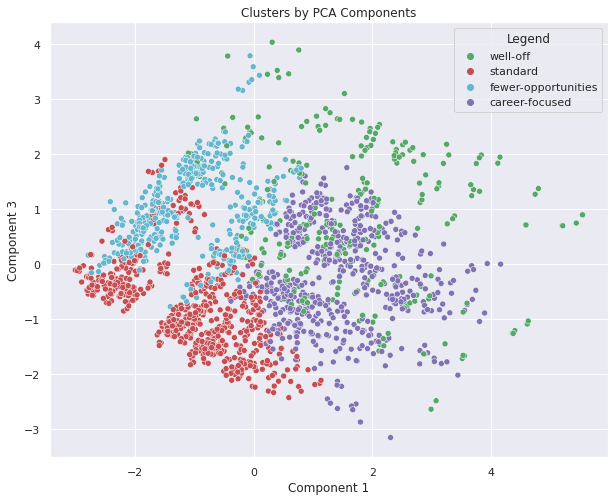

In [152]:
_axis = df_seg_pca_kmeans['Component 2']
y_axis = df_seg_pca_kmeans['Component 3']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['Legend'], palette = ['g','r','c','m'])
plt.title('Clusters by PCA Components')
plt.show